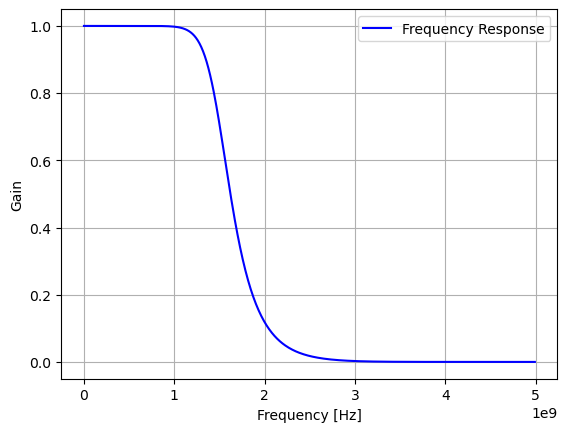

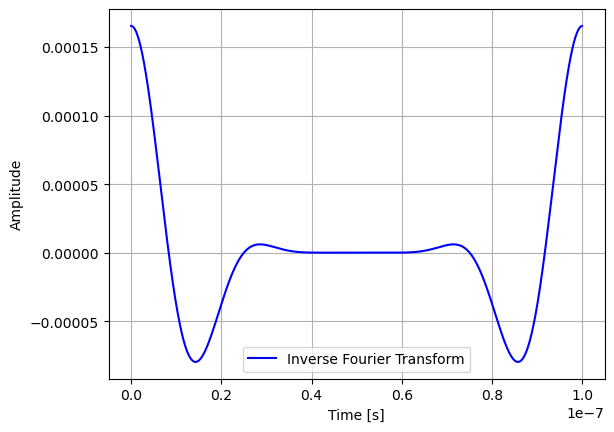

In [66]:
import numpy as np
from scipy.signal import butter, freqz
import matplotlib.pyplot as plt
from scipy import constants

eps0 = constants.epsilon_0

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Filter parameters
fs = 100.0 * 1e8 # Sample rate (Hz)
cutoff_freq = 15.0*1e8  # Desired cutoff frequency (Hz)
order = 6  # Filter order

# Compute the frequency response of the filter
b, a = butter_lowpass(cutoff_freq, fs, order=order)
w, h = freqz(b, a, fs=fs)

# Plot the frequency response
plt.figure()
plt.plot(w, abs(h), 'b-', label='Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid(True)
plt.legend()
plt.show()

# Compute the inverse Fourier transform of the filter coefficients
n = 1000  # Number of points for the time-domain representation
filter_time_domain = (np.fft.ifft(np.concatenate((b, np.zeros(n - len(b))))))

# Generate the time array for the filter representation
t = np.arange(0, n) / fs

# Plot the inverse Fourier transform
plt.figure()
plt.plot(t, filter_time_domain.real, 'b-', label='Inverse Fourier Transform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


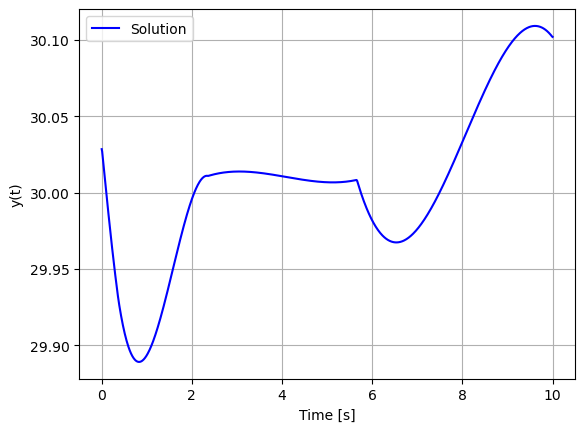

In [81]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE function
def ode_func(t, y):
    y_prime = y[1]
    y_double_prime = -2 * (y[1] ** 2) * np.interp(t, t_eval, filter_time_domain)
    return [y_prime, y_double_prime]

# Initial conditions
y0 = [0.0 + 0.0j, 30.0 + 0.0j]  # y(0) = 0 and y'(0) = 30

# Time array for evaluation
t_start = 0.0
t_end = 10.0
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Solve the ODE
solution = solve_ivp(ode_func, [t_start, t_end], y0, t_eval=t_eval)

# Extract the solution
t_solution = solution.t
y_solution = solution.y[0]

# Plot the solution
plt.figure()
plt.plot(t_solution, np.gradient(y_solution.real), 'b-', label='Solution')
plt.xlabel('Time [s]')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()


In [79]:
np.gradient(y_solution.real)

array([0.03002988, 0.03002973, 0.03002943, 0.03002914, 0.03002884,
       0.03002854, 0.03002824, 0.03002795, 0.03002765, 0.03002736,
       0.03002707, 0.03002678, 0.03002649, 0.0300262 , 0.03002591,
       0.03002562, 0.03002534, 0.03002506, 0.03002478, 0.0300245 ,
       0.03002423, 0.03002395, 0.03002368, 0.03002342, 0.03002315,
       0.03002289, 0.03002263, 0.03002237, 0.03002212, 0.03002187,
       0.03002162, 0.03002138, 0.03002114, 0.0300209 , 0.03002067,
       0.03002044, 0.03002021, 0.03002002, 0.03001988, 0.03001977,
       0.03001966, 0.03001955, 0.03001944, 0.03001934, 0.03001925,
       0.03001915, 0.03001906, 0.03001897, 0.03001889, 0.03001881,
       0.03001873, 0.03001865, 0.03001858, 0.03001851, 0.03001844,
       0.03001838, 0.03001831, 0.03001826, 0.0300182 , 0.03001815,
       0.0300181 , 0.03001805, 0.030018  , 0.03001796, 0.03001792,
       0.03001788, 0.03001785, 0.03001782, 0.03001779, 0.03001776,
       0.03001774, 0.03001772, 0.0300177 , 0.03001768, 0.03001

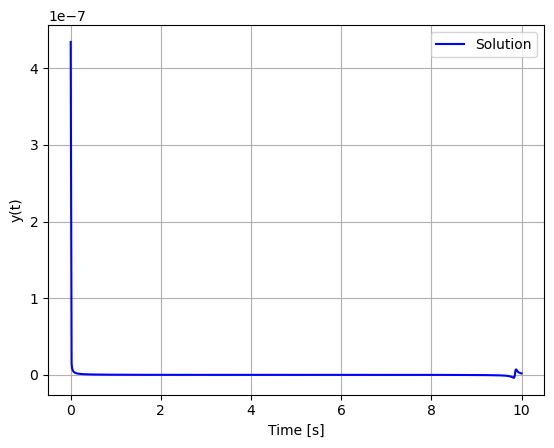

In [72]:
import numpy as np
from scipy.integrate import complex_ode
import matplotlib.pyplot as plt

# Define the ODE function
def ode_func(t, y):
    y_prime = y[1]
    y_double_prime = -2 * (y[1] ** 2) * np.interp(t, t_eval, filter_time_domain)/eps0
    return [y_prime, y_double_prime]

# Initial conditions
y0 = [0.0 + 0.0j, 30.0 + 0.0j]  # y(0) = 0 and y'(0) = 30

# Time array for evaluation
t_start = 0.0
t_end = 10.0
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Create the complex ODE solver
solver = complex_ode(ode_func)
solver.set_initial_value(y0, t_start)

# Initialize the solution array
solution = np.zeros((num_points,), dtype=np.complex128)
solution[0] = y0[0]

# Integrate the ODE
for i in range(1, num_points):
    solver.integrate(t_eval[i])
    solution[i] = solver.y[0]

# Extract the real and imaginary parts of the solution
y_solution = solution.real

# Plot the solution
plt.figure()
plt.plot(t_eval, np.gradient(y_solution), 'b-', label='Solution')
plt.xlabel('Time [s]')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()


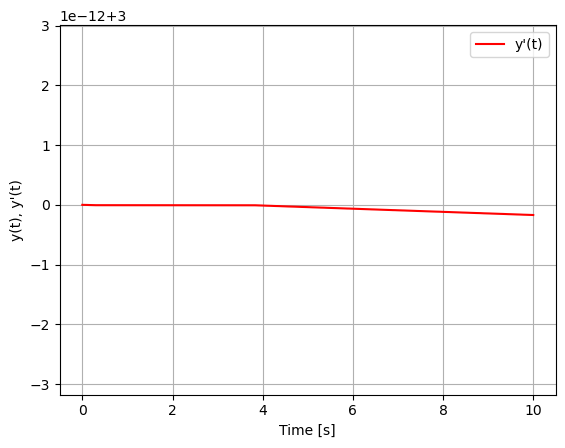

In [101]:
import numpy as np
from scipy.integrate import complex_ode
import matplotlib.pyplot as plt

# Define the ODE function
def ode_func(t, y):
    y_prime = y[1]
    y_double_prime = -2 * (y[1] ** 2) * np.interp(t, t_eval, filter_time_domain)
    return [y_prime, y_double_prime]

# Initial conditions
y0 = [0.0 + 0.0j, 3.0*eps0 + 0.0j]  # y(0) = 0 and y'(0) = 30

# Time array for evaluation
t_start = 0.0
t_end = 10.0
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Create the complex ODE solver
solver = complex_ode(ode_func)
solver.set_initial_value(y0, t_start)

# Initialize the solution arrays
solution = np.zeros((2, num_points), dtype=np.complex128)
solution[:, 0] = y0

# Integrate the ODE
for i in range(1, num_points):
    solver.integrate(t_eval[i])
    solution[:, i] = solver.y

# Extract the real parts of the solution
y_solution = solution[0].real
y_prime_solution = solution[1].real

# Plot the solution
plt.figure()
#plt.plot(t_eval, y_solution, 'b-', label='y(t)')
plt.plot(t_eval, y_prime_solution/eps0, 'r-', label="y'(t)")
plt.xlabel('Time [s]')
plt.ylabel('y(t), y\'(t)')
plt.grid(True)
plt.legend()
plt.show()


In [102]:
y_prime_solution/eps0

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

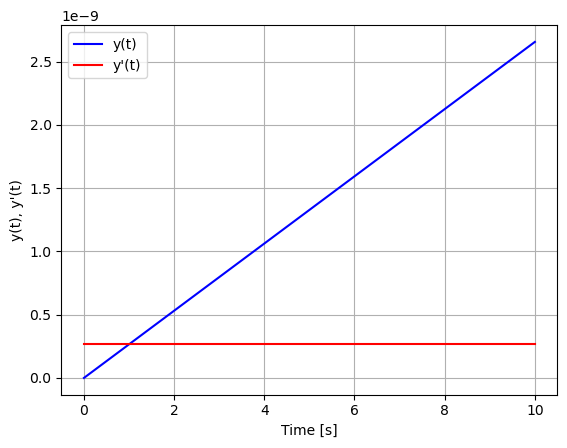

In [103]:
import numpy as np
from scipy.integrate import complex_ode
import matplotlib.pyplot as plt

# Define the ODE function
def ode_func(t, y):
    y_prime = y[1]
    y_double_prime = -2 * (y[1] ** 2) * np.interp(t, t_eval, filter_time_domain)
    return [y_prime, y_double_prime]

# Constants
eps0 = 8.854e-12  # Free space permittivity

# Initial conditions
y0 = [0.0 + 0.0j, 30.0 * eps0 + 0.0j]  # y(0) = 0 and y'(0) = 30*eps0

# Time array for evaluation
t_start = 0.0
t_end = 10.0
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Create the complex ODE solver
solver = complex_ode(ode_func)
solver.set_initial_value(y0, t_start)

# Initialize the solution arrays
solution = np.zeros((2, num_points), dtype=np.complex128)
solution[:, 0] = y0

# Integrate the ODE
for i in range(1, num_points):
    solver.integrate(t_eval[i])
    solution[:, i] = solver.y

# Extract the real parts of the solution
y_solution = solution[0].real
y_prime_solution = solution[1].real

# Plot the solution
plt.figure()
plt.plot(t_eval, y_solution, 'b-', label='y(t)')
plt.plot(t_eval, y_prime_solution, 'r-', label="y'(t)")
plt.xlabel('Time [s]')
plt.ylabel('y(t), y\'(t)')
plt.grid(True)
plt.legend()
plt.show()


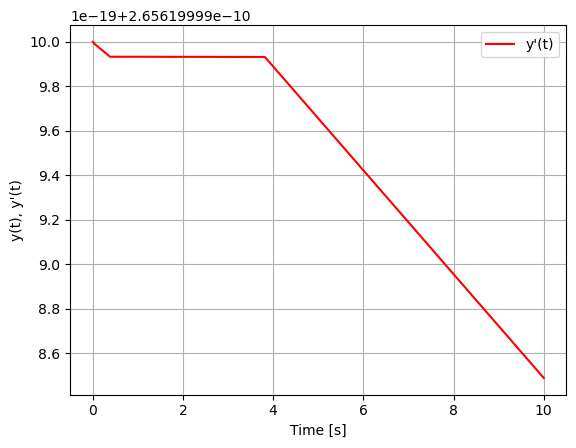

In [117]:
import numpy as np
from scipy.integrate import complex_ode
import matplotlib.pyplot as plt

# Define the ODE function
def ode_func(t, y):
    y_prime = y[1]
    y_double_prime = -2 * (y[1] ** 2) * np.interp(t, t_eval, filter_time_domain)*1000
    return [y_prime, y_double_prime]

# Constants
eps0 = 8.854e-12  # Free space permittivity

# Scaling factors
scale_y = 1.0
scale_t = 1.0

# Scaled initial conditions
y0_scaled = [0.0 + 0.0j, 30.0 * eps0 / scale_y + 0.0j]  # y(0) = 0 and y'(0) = 30*eps0

# Time array for evaluation
t_start = 0.0 / scale_t
t_end = 10.0 / scale_t
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Create the complex ODE solver
solver = complex_ode(ode_func)
solver.set_initial_value(y0_scaled, t_start)

# Initialize the solution arrays
solution = np.zeros((2, num_points), dtype=np.complex128)
solution[:, 0] = y0_scaled

# Integrate the ODE
for i in range(1, num_points):
    solver.integrate(t_eval[i])
    solution[:, i] = solver.y



# Scale back the solution
solution *= scale_y

# Extract the real parts of the solution
y_solution = solution[0].real
y_prime_solution = solution[1].real

# Scale back the time array
t_eval *= scale_t

# Plot the solution
plt.figure()
#plt.plot(t_eval, y_solution, 'b-', label='y(t)')
plt.plot(t_eval, y_prime_solution, 'r-', label="y'(t)")
plt.xlabel('Time [s]')
plt.ylabel('y(t), y\'(t)')
plt.grid(True)
plt.legend()
plt.show()


In [118]:
y_prime_solution

array([2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10,
       2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e-10, 2.6562e

/var/folders/v1/t149q84d20s60ktyxvb3bft40000gn/T/ipykernel_83587/4215027555.py:48: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(t_eval), np.log(y_prime_solution/eps0), 'r-', label="y'(t)")


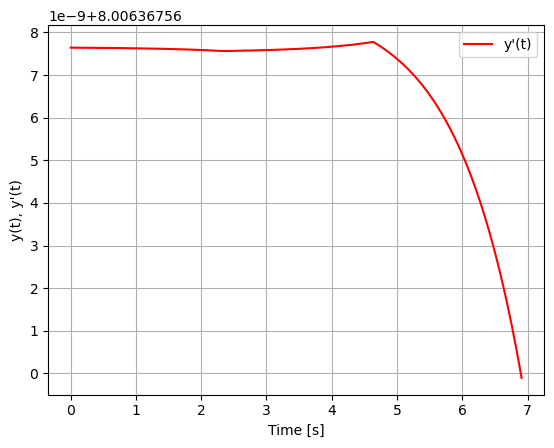

In [115]:
import numpy as np
from scipy.integrate import complex_ode
import matplotlib.pyplot as plt

# Define the ODE function
def ode_func(t, y):
    y_prime = y[1]
    y_double_prime = -2 * (y[1] ** 2) * np.interp(t, t_eval, filter_time_domain)
    return [y_prime, y_double_prime]

# Constants
eps0 = 8.854e-12  # Free space permittivity

# Scaling factors
scale_y = 1.0/100
scale_t = 1.0/100

# Scaled initial conditions
y0_scaled = [0.0 + 0.0j, 30.0 * eps0 / scale_y + 0.0j]  # y(0) = 0 and y'(0) = 30*eps0

# Time array for evaluation
t_start = 0.0 / scale_t
t_end = 10.0 / scale_t
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Create the complex ODE solver
solver = complex_ode(ode_func)
solver.set_initial_value(y0_scaled, t_start)

# Initialize the solution arrays
solution = np.zeros((2, num_points), dtype=np.complex128)
solution[:, 0] = y0_scaled

# Integrate the ODE
for i in range(1, num_points):
    solver.integrate(t_eval[i])
    solution[:, i] = solver.y

# Extract the real parts of the solution
y_solution = solution[0].real
y_prime_solution = solution[1].real


# Plot the solution
plt.figure()
#plt.plot(t_eval, y_solution, 'b-', label='y(t)')
plt.plot(np.log(t_eval), np.log(y_prime_solution/eps0), 'r-', label="y'(t)")
plt.xlabel('Time [s]')
plt.ylabel('y(t), y\'(t)')
plt.grid(True)
plt.legend()
plt.show()

In [111]:
y_prime_solution/eps0

array([3000.        , 2999.99999997, 2999.99999995, 2999.99999992,
       2999.9999999 , 2999.99999987, 2999.99999984, 2999.99999982,
       2999.99999979, 2999.99999977, 2999.99999974, 2999.99999974,
       2999.99999975, 2999.99999975, 2999.99999976, 2999.99999977,
       2999.99999977, 2999.99999978, 2999.99999979, 2999.99999979,
       2999.9999998 , 2999.99999981, 2999.99999981, 2999.99999982,
       2999.99999983, 2999.99999984, 2999.99999984, 2999.99999985,
       2999.99999986, 2999.99999986, 2999.99999987, 2999.99999988,
       2999.99999988, 2999.99999989, 2999.9999999 , 2999.99999991,
       2999.99999991, 2999.99999992, 2999.99999993, 2999.99999993,
       2999.99999994, 2999.99999995, 2999.99999995, 2999.99999996,
       2999.99999997, 2999.99999997, 2999.99999998, 2999.99999999,
       3000.        , 3000.        , 3000.00000001, 3000.00000002,
       3000.00000002, 3000.00000003, 3000.00000004, 3000.00000004,
       3000.00000005, 3000.00000006, 3000.00000006, 3000.00000

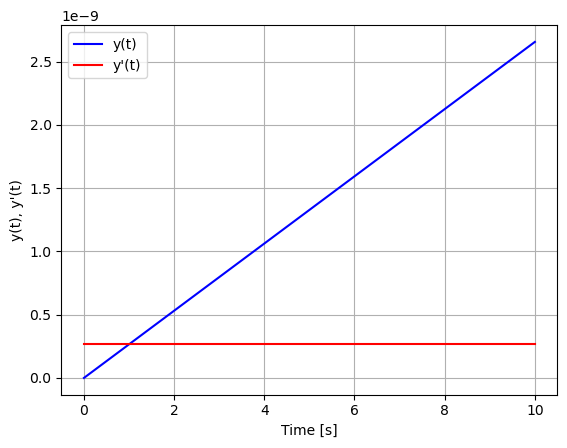

In [119]:
import numpy as np
from scipy.integrate import complex_ode
import matplotlib.pyplot as plt

# Define the ODE function
def ode_func(t, y):
    y_prime = y[1]
    phi_term = phi(y[0])  # Calculate the phi(y(t)) term
    y_double_prime = -2 * (y[1] ** 2) * np.interp(t, t_eval, filter_time_domain) + phi_term
    return [y_prime, y_double_prime]

# Define the phi function
def phi(y):
    return y**2  # Example function for phi(y)

# Constants
eps0 = 8.854e-12  # Free space permittivity

# Scaling factors
scale_y = 1.0
scale_t = 1.0

# Scaled initial conditions
y0_scaled = [0.0 + 0.0j, 30.0 * eps0 / scale_y + 0.0j]  # y(0) = 0 and y'(0) = 30*eps0

# Time array for evaluation
t_start = 0.0 / scale_t
t_end = 10.0 / scale_t
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Create the complex ODE solver
solver = complex_ode(ode_func)
solver.set_initial_value(y0_scaled, t_start)

# Initialize the solution arrays
solution = np.zeros((2, num_points), dtype=np.complex128)
solution[:, 0] = y0_scaled

# Integrate the ODE
for i in range(1, num_points):
    solver.integrate(t_eval[i])
    solution[:, i] = solver.y

# Scale back the solution
solution *= scale_y

# Extract the real parts of the solution
y_solution = solution[0].real
y_prime_solution = solution[1].real

# Scale back the time array
t_eval *= scale_t

# Plot the solution
plt.figure()
plt.plot(t_eval, y_solution, 'b-', label='y(t)')
plt.plot(t_eval, y_prime_solution, 'r-', label="y'(t)")
plt.xlabel('Time [s]')
plt.ylabel('y(t), y\'(t)')
plt.grid(True)
plt.legend()
plt.show()
